To show matplotlib in browser itself

In [1]:
%matplotlib inline

In [2]:
path="data/kaggle_dogs_cats/"

A few basic libraries that we'll need for the initial exercises:

In [3]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

Lets use a VGG model which is pretrained with imagenet

In [4]:
import utils; reload(utils)
from utils import plots

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
Using Theano backend.


In [5]:
import theano

In [6]:
theano.sandbox.cuda.dnn_available()

True

In [12]:
# As large as you can, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
batch_size=64

In [13]:
# Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [14]:
vgg = Vgg16()

Weights loaded
Getting Models
models done


In [15]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)

Found 0 images belonging to 0 classes.


In [16]:
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)

Found 0 images belonging to 0 classes.


In [17]:
vgg.finetune(batches)

In [ ]:
vgg.fit(batches, val_batches, nb_epoch=1)

Starting to fit data
Epoch 1/1
22080/23000 [===========================>..] - ETA: 27s - loss: 0.1276 - acc: 0.9657

### Use Vgg16 for basic image recognition

In [8]:
vgg = Vgg16()

INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.10--generic-x86_64-with-debian-stretch-sid-x86_64-2.7.13-64/lock_dir/lock


Weights loaded
Getting Models
models done


In [9]:
batches = vgg.get_batches(path+'train', batch_size=4)

Found 16 images belonging to 2 classes.


In [10]:
imgs,labels = next(batches)

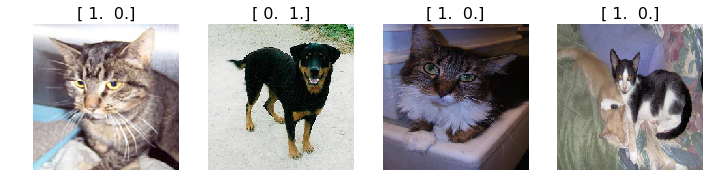

In [11]:
plots(imgs, titles=labels)

In [13]:
vgg.predict(imgs, True)

(array([ 0.6869,  0.7914,  0.5164,  0.2684], dtype=float32),
 array([281, 234, 281, 158]),
 [u'tabby', u'Rottweiler', u'tabby', u'toy_terrier'])